In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Telco.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df = df.drop(columns=['customerID'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [89]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

label_encoder = preprocessing.LabelEncoder()
enc = OneHotEncoder()
 
df['gender']= label_encoder.fit_transform(df['gender'])
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']= label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])
df['Contract']= label_encoder.fit_transform(df['Contract'])
df['Churn']= label_encoder.fit_transform(df['Churn'])
print(df.head(5))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [90]:
df_copy = df.copy()

df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)
df_copy.TotalCharges.dtype

dtype('float64')

In [20]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

df_copy.TotalCharges

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: TotalCharges, Length: 7043, dtype: float64

In [21]:
X = df_copy.drop(['Churn'], axis = 1)

y = df_copy['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,2035.20
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7430.40
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,325.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,297.60


In [22]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
ypred = logmodel.predict(X)
ypred

array([1, 0, 0, ..., 0, 1, 0])

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score: ",accuracy_score(y,ypred))
print("Confusion Matrix: \n",confusion_matrix(y,ypred))
print(classification_report(y,ypred))

Accuracy Score:  0.8023569501632827
Confusion Matrix: 
 [[4621  553]
 [ 839 1030]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5174
           1       0.65      0.55      0.60      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.72      0.73      7043
weighted avg       0.79      0.80      0.80      7043



[[4621  553]
 [ 839 1030]]


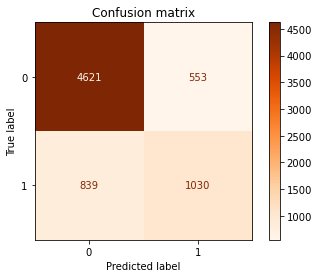

In [105]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(logmodel, X, y, cmap=plt.cm.Oranges)
title = "Confusion matrix"
disp.ax_.set_title(title)

print(disp.confusion_matrix)

In [28]:
from sklearn.naive_bayes import GaussianNB

In [37]:
NBmodel = GaussianNB()
NBmodel.fit(X,y)
y_pred = NBmodel.predict(X)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [39]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      5174
           1       0.52      0.74      0.61      1869

    accuracy                           0.75      7043
   macro avg       0.71      0.75      0.72      7043
weighted avg       0.79      0.75      0.76      7043



[[3918 1256]
 [ 488 1381]]


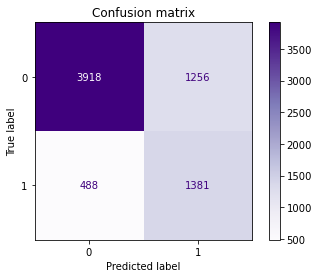

In [107]:
disp = plot_confusion_matrix(NBmodel, X, y, cmap=plt.cm.Purples)
title = "Confusion matrix"
disp.ax_.set_title(title)

print(disp.confusion_matrix)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X,y)
knnscore = knnmodel.score(X,y)
knnscore

0.8590089450518245

In [113]:
accuracy_val = [] #to store accuracy values for different k
for K in range(10):
    K = K+1
    knnmodel = KNeighborsClassifier(n_neighbors=K)

    knnmodel.fit(X, y)  #fit the model
    pred=knnmodel.predict(X) #make prediction on test set
    error = accuracy_score(y,pred) #calculate rmse
    accuracy_val.append(error) #store accuracy values
    print('Accuracy value for k= ' , K , 'is:', error)

Accuracy value for k=  1 is: 0.9965923612097117
Accuracy value for k=  2 is: 0.8591509300014198
Accuracy value for k=  3 is: 0.8590089450518245
Accuracy value for k=  4 is: 0.8311798949311373
Accuracy value for k=  5 is: 0.8306119551327559
Accuracy value for k=  6 is: 0.8216669033082493
Accuracy value for k=  7 is: 0.8196791140139146
Accuracy value for k=  8 is: 0.81158597188698
Accuracy value for k=  9 is: 0.8101661223910266
Accuracy value for k=  10 is: 0.8073264233991196


In [77]:
knnmodel = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knnmodel.fit(X,y)
results = pd.DataFrame([], columns = ["distance metric", "accuracy"])
results.loc["K = 2"] = ['euclidean' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151


In [78]:
knnmodel = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knnmodel.fit(X,y)
#results = pd.DataFrame([], columns = ["distance metric", "accuracy"])
results.loc["K = 3"] = ['euclidean' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009


In [79]:
knnmodel = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knnmodel.fit(X,y)

results.loc["K = 4"] = ['euclidean' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180


In [80]:
knnmodel = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knnmodel.fit(X,y)

results.loc["'K = 2"] = ['manhattan' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417


In [81]:
knnmodel = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knnmodel.fit(X,y)

results.loc["'K = 3"] = ['manhattan' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713


In [82]:
knnmodel = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knnmodel.fit(X,y)

results.loc["'K = 4"] = ['manhattan' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730


In [83]:
knnmodel = KNeighborsClassifier(n_neighbors=2, metric='chebyshev')
knnmodel.fit(X,y)

results.loc["''K = 2"] = ['chebyshev' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731


In [84]:
knnmodel = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')
knnmodel.fit(X,y)

results.loc["''K = 3"] = ['chebyshev' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731
''K = 3,chebyshev,0.858157


In [85]:
knnmodel = KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
knnmodel.fit(X,y)

results.loc["''K = 4"] = ['chebyshev' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731
''K = 3,chebyshev,0.858157
''K = 4,chebyshev,0.829334


In [86]:
knnmodel = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
knnmodel.fit(X,y)

results.loc["'''K = 2"] = ['minkowski' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731
''K = 3,chebyshev,0.858157
''K = 4,chebyshev,0.829334
'''K = 2,minkowski,0.859151


In [87]:
knnmodel = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knnmodel.fit(X,y)

results.loc["'''K = 3"] = ['minkowski' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731
''K = 3,chebyshev,0.858157
''K = 4,chebyshev,0.829334
'''K = 2,minkowski,0.859151


In [88]:
knnmodel = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knnmodel.fit(X,y)

results.loc["'''K = 4"] = ['minkowski' ,knnmodel.score(X,y)]
results

,distance metric,accuracy
K = 2,euclidean,0.859151
K = 3,euclidean,0.859009
K = 4,euclidean,0.831180
'K = 2,manhattan,0.862417
'K = 3,manhattan,0.860713
'K = 4,manhattan,0.834730
''K = 2,chebyshev,0.857731
''K = 3,chebyshev,0.858157
''K = 4,chebyshev,0.829334
'''K = 2,minkowski,0.859151


## Best accuracy: 0.862417
- K = 2 
- distance metric = manhattan